# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

[**Loading libraries that are required for the project. .**]

In [1]:
# Loading all the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime as dt




### Load data

**Loadading the project data and looking at the general information.**

In [2]:
# Load the data file into a DataFrame

try:
    auto = pd.read_csv('vehicles_us.csv')

except:
    auto = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:

auto.info()
auto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
auto.describe(include=object)

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [5]:


auto.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
auto.query('model_year < 1950').head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,NaN,2019-01-18,24
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,NaN,2018-11-22,10
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,NaN,2018-08-19,10


In [7]:
auto.query('price < 100').tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28
50430,5,2011.0,toyota sienna,good,6.0,gas,NaN,automatic,SUV,green,NaN,2018-12-03,5
50971,10,2012.0,toyota prius,excellent,4.0,hybrid,101000.0,automatic,hatchback,green,NaN,2019-03-16,29
51256,1,2012.0,honda civic lx,excellent,4.0,gas,71262.0,automatic,sedan,blue,NaN,2018-05-06,53


In [8]:
auto.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
23850,7000,2012.0,chevrolet traverse,excellent,6.0,gas,NaN,automatic,SUV,white,NaN,2018-10-27,24


In [9]:
auto.duplicated().sum()

0

In [10]:
auto.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
auto.isnull().sum()/len(auto)*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

There are 51525 entries.
We have missing values in: **model_year, cylinders, odometer, paint_color, is_4wd** columns. 
We will change data type to **int** in: **model_year, cylinders, odometer**.
In the **is_4wd** column we should assume that NoNs are '0' in other words 'not 4wds'.
**date_posted** we should change from object to data type

****Studying  missing values for each column in more details and decide what to do with them based on meaningful hypotheses.****

## Treat missing values (if any)

Studying **'model_year'** column:

In [12]:
auto['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [13]:
vintage_count = auto.query('model_year < 1967')
old_count = auto.query('2000 > model_year > 1967')
print(vintage_count['model_year'].value_counts())
print()
print(old_count['model_year'].value_counts())

1966.0    23
1965.0    10
1964.0     7
1963.0     3
1962.0     3
1960.0     3
1908.0     2
1958.0     2
1955.0     1
1954.0     1
1948.0     1
1961.0     1
1936.0     1
1949.0     1
1929.0     1
Name: model_year, dtype: int64

1999.0    546
1998.0    378
1997.0    327
1996.0    189
1995.0    184
1994.0    118
1993.0    108
1989.0     58
1990.0     58
1992.0     57
1991.0     51
1988.0     40
1986.0     39
1987.0     31
1984.0     20
1979.0     19
1985.0     18
1968.0     16
1973.0     15
1978.0     15
1977.0     13
1980.0     12
1969.0     10
1981.0     10
1970.0     10
1982.0      9
1971.0      7
1983.0      7
1975.0      7
1972.0      5
1974.0      4
1976.0      3
Name: model_year, dtype: int64


In [14]:
relevant_years = auto.query('model_year > 1995')
group_years = relevant_years.groupby('model')['model_year'].median()
for i in group_years.index:
    auto.loc[( auto['model'] == i) & (auto['model_year'].isnull()),'model_year'] = group_years[i]
auto['model_year'] = auto['model_year'].astype(int) 
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.9+ MB


We sorted ouer list by **'model_year'** and filtered really old cars and also changed the data type to int

Studying **'cylinders'** column:
<br>
Cylinders are always even and int. We should use median here:

In [15]:
auto['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [16]:
auto['cylinders'] = auto.groupby('model')['cylinders'].apply(lambda x: x.fillna(x.median()))

In [17]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.9+ MB


In [18]:
for row in auto:
    try: 
        auto['cylinders'] = auto['cylinders'].astype(int)
    except:
        auto['cylinders'] = auto.groupby('model')['cylinders'].fillna(method = 'ffill')
        auto['cylinders'] = auto['cylinders'].astype(int)

In [19]:
auto['cylinders'].unique()

array([ 6,  4,  8,  5, 10,  3, 12])

In [20]:
auto['cylinders'] = auto['cylinders'].replace(3, 4)
auto['cylinders'] = auto['cylinders'].replace(5, 6)

In [21]:
auto['cylinders'].unique()

array([ 6,  4,  8, 10, 12])

In [22]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 4.7+ MB


Studying **'odometer'** column:


In [23]:
auto['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: odometer, Length: 17762, dtype: int64

In [24]:
auto['odometer'] = auto.groupby(['model','model_year'])['odometer']\
                        .transform(lambda grp: grp.fillna(np.mean(grp)))

In [25]:
for row in auto:
    try: 
        auto['odometer'] = auto['odometer'].astype(int)
    except:
        auto['odometer'] = auto.groupby('model')['model_year'].fillna(method = 'ffill')
        auto['odometer'] = auto['odometer'].astype(int)

In [26]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int32  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 4.5+ MB


Studying **'paint_color'** column:

In [27]:
auto['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [28]:
auto['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [29]:
auto['paint_color'] = auto['paint_color'].replace(np.nan, 'unknown')

In [30]:
auto['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [31]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int32  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 4.5+ MB


Studying **'is_4wd'** column:

In [32]:
auto['is_4wd' ].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [33]:
auto['is_4wd'].unique()

array([ 1., nan])

In [34]:
auto['is_4wd'] = auto['is_4wd'].fillna('0')

In [35]:
auto['is_4wd']

0        1.0
1        1.0
2          0
3          0
4          0
        ... 
51520      0
51521      0
51522      0
51523      0
51524      0
Name: is_4wd, Length: 51525, dtype: object

In [36]:
auto['is_4wd'].unique()

array([1.0, '0'], dtype=object)

In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  object
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int32(3), int64(2), object(8)
memory usage: 4.5+ MB


**We got read of all missing values**


**Duplicates**

Duplicates in **'model'** column:

In [38]:
print(auto['model'].unique())
auto['model'] = auto['model'].str.replace('-','')
auto['model'] = auto['model'].str.replace('mercedesbenz','mercedes-benz')




['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

In [39]:
print(auto['model'].unique())

['bmw x5' 'ford f150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda crv' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'ford

In [40]:
from collections import Counter

In [41]:
Counter(auto['model'])

Counter({'bmw x5': 267,
         'ford f150': 3326,
         'hyundai sonata': 477,
         'chrysler 200': 243,
         'chrysler 300': 316,
         'toyota camry': 990,
         'honda pilot': 302,
         'kia sorento': 236,
         'chevrolet silverado 1500': 2171,
         'honda accord': 964,
         'ram 1500': 1750,
         'gmc yukon': 331,
         'jeep cherokee': 293,
         'chevrolet traverse': 329,
         'hyundai elantra': 423,
         'chevrolet tahoe': 713,
         'toyota rav4': 461,
         'chevrolet silverado': 1271,
         'jeep wrangler': 1119,
         'chevrolet malibu': 617,
         'ford fusion se': 309,
         'chevrolet impala': 674,
         'chevrolet corvette': 499,
         'jeep liberty': 355,
         'toyota camry le': 316,
         'nissan altima': 813,
         'subaru outback': 538,
         'toyota highlander': 334,
         'dodge charger': 415,
         'toyota tacoma': 827,
         'chevrolet equinox': 591,
         'nissa

Cheking other columns:

In [42]:
auto['price'].unique()

array([ 9400, 25500,  5500, ...,  3636,  9249,  7455], dtype=int64)

In [43]:
auto['price'].value_counts()

1        798
6995     719
5995     655
4995     624
3500     620
        ... 
58500      1
3993       1
32987      1
3744       1
7455       1
Name: price, Length: 3443, dtype: int64

In [44]:


auto['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [45]:
auto.duplicated().sum()

0

**We fixed all duplicates**

## Fix data types

[As the data is more or less complete now, fix the data types if required.]

**Done previously**

## Enrich data

**Addiing datetime values for when the ad was placed**

In [46]:

auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  object
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int32(3), int64(2), object(8)
memory usage: 4.5+ MB


In [47]:
auto['date_posted']

0        2018-06-23
1        2018-10-19
2        2019-02-07
3        2019-03-22
4        2019-04-02
            ...    
51520    2018-10-03
51521    2018-11-14
51522    2018-11-15
51523    2018-07-02
51524    2018-06-05
Name: date_posted, Length: 51525, dtype: object

In [48]:
ex=auto['date_posted'].loc[0]
ex


'2018-06-23'

In [49]:
type(ex)

str

In [50]:
pd.to_datetime(ex)

Timestamp('2018-06-23 00:00:00')

In [51]:
pd.to_datetime(ex).month

6

In [52]:
pd.to_datetime(ex).day

23

In [53]:
auto['day_posted']=pd.to_datetime(auto['date_posted']).dt.day_name()
auto.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday


In [54]:

auto['month_posted']=pd.to_datetime(auto['date_posted']).dt.month
auto.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday,2
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4


In [55]:
auto['year_posted']=pd.to_datetime(auto['date_posted']).dt.year
auto.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019


**Adding the vehicle's age when the ad was placed**:

In [56]:

auto['age_than_posted'] = auto['year_posted'] - auto['model_year']+1
auto.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10,2018,8
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,7
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3


**Add the vehicle's average mileage per year**:

In [57]:

auto['mileage_per_year'] = auto['odometer'] / auto['age_than_posted']
auto.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8,251.375000
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10,2018,8,251.375000
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,7,287.571429
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,17,117.823529
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3,672.333333


**Replacing the condition values with something that can be manipulated more easily**:

    new = 5
    like new = 4
    excellent = 3
    good = 2
    fair = 1
    salvage = 0

In [58]:

auto['condition'].unique()



array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [59]:
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
    
}

In [60]:
condition_dict.keys()

dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])

In [61]:
condition_dict.values()

dict_values([5, 4, 3, 2, 1, 0])

In [62]:
auto['new_condition']=auto['condition'].map(condition_dict)
auto.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8,251.375000,2
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10,2018,8,251.375000,2
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,7,287.571429,4
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,17,117.823529,1
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3,672.333333,3


## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

**Printing the general/summary information about the DataFrame**

In [63]:

auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        51525 non-null  int32  
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         51525 non-null  int32  
 5   fuel              51525 non-null  object 
 6   odometer          51525 non-null  int32  
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       51525 non-null  object 
 10  is_4wd            51525 non-null  object 
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  day_posted        51525 non-null  object 
 14  month_posted      51525 non-null  int64  
 15  year_posted       51525 non-null  int64  
 16  age_than_posted   51525 non-null  int64 

In [64]:

auto.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8,251.375000,2
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10,2018,8,251.375000,2
2,5500,2013,hyundai sonata,like new,4,gas,2013,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,7,287.571429,4
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,17,117.823529,1
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3,672.333333,3
5,14990,2014,chrysler 300,excellent,6,gas,2014,automatic,sedan,black,1.0,2018-06-20,15,Wednesday,6,2018,5,402.800000,3
6,12990,2015,toyota camry,excellent,4,gas,2015,automatic,sedan,white,0,2018-12-27,73,Thursday,12,2018,4,503.750000,3
7,15990,2013,honda pilot,excellent,6,gas,2013,automatic,SUV,black,1.0,2019-01-07,68,Monday,1,2019,7,287.571429,3
8,11500,2012,kia sorento,excellent,4,gas,2012,automatic,SUV,unknown,1.0,2018-07-16,19,Monday,7,2018,7,287.428571,3
9,9200,2008,honda pilot,excellent,6,gas,2008,automatic,SUV,blue,1.0,2019-02-15,17,Friday,2,2019,12,167.333333,3


In [65]:
auto.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
51515,12000,2005,chevrolet silverado 2500hd,good,8,diesel,2005,automatic,pickup,silver,1.0,2018-08-18,52,Saturday,8,2018,14,143.214286,2
51516,8999,2011,jeep grand cherokee,good,6,gas,2011,automatic,SUV,white,1.0,2018-11-01,51,Thursday,11,2018,8,251.375000,2
51517,11000,2012,dodge charger,excellent,8,gas,2012,automatic,sedan,black,0,2019-04-19,44,Friday,4,2019,8,251.500000,3
51518,3750,2005,ford taurus,excellent,6,gas,2005,automatic,sedan,silver,0,2018-08-10,63,Friday,8,2018,14,143.214286,3
51519,11750,2015,honda accord,excellent,4,gas,2015,automatic,coupe,unknown,0,2018-11-24,89,Saturday,11,2018,4,503.750000,3
51520,9249,2013,nissan maxima,like new,6,gas,2013,automatic,sedan,black,0,2018-10-03,37,Wednesday,10,2018,6,335.500000,4
51521,2700,2002,honda civic,salvage,4,gas,2002,automatic,sedan,white,0,2018-11-14,22,Wednesday,11,2018,17,117.764706,0
51522,3950,2009,hyundai sonata,excellent,4,gas,2009,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,10,200.900000,3
51523,7455,2013,toyota corolla,good,4,gas,2013,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,6,335.500000,2
51524,6300,2014,nissan altima,good,4,gas,2014,automatic,sedan,unknown,0,2018-06-05,10,Tuesday,6,2018,5,402.800000,2


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

In [66]:
import matplotlib.pyplot as plt



**Stydying 'price' parameter**:

**For the stydies we desided to use "percentiles"** it more flaxible then **IQR**

In [67]:
def distribution_percentile(price):
    print('The histogram of: {}'.format('price'))
    auto['price'].hist()
    plt.show()
    if auto['price'].mean()>auto['price'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('price'))
    print(auto['price'].describe())
    ninety_five = np.percentile(auto['price'], 95)
    five = np.percentile(auto['price'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(auto[(auto['price']<five)|(auto['price']>ninety_five)]),"values that we can consider outliers")

The histogram of: price


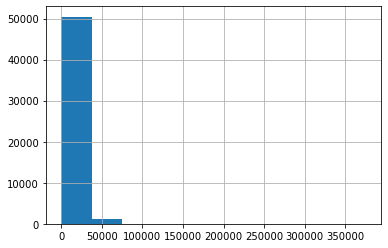

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1950.0
max border: 30300.0
---------------------------------------
The outliers are considered to be values below 1950.0 and above 30300.0
We have 5141 values that we can consider outliers


In [68]:
distribution_percentile('price')

In [69]:
def distribution_percentile(cylinders):
    print('The histogram of: {}'.format('cylinders'))
    auto['cylinders'].hist()
    plt.show()
    if auto['cylinders'].mean()>auto['cylinders'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('cylinders'))
    print(auto['cylinders'].describe())
    ninety_five = np.percentile(auto['cylinders'], 95)
    five = np.percentile(auto['cylinders'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(auto[(auto['cylinders']<five)|(auto['cylinders']>ninety_five)]),"values that we can consider outliers")

The histogram of: cylinders


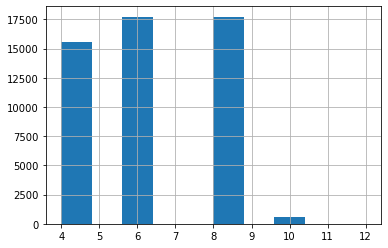

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.127433
std          1.654260
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 551 values that we can consider outliers


In [70]:
distribution_percentile('cylinders')

In [71]:
def distribution_percentile(age_than_posted):
    print('The histogram of: {}'.format('age_than_posted'))
    auto['age_than_posted'].hist()
    plt.show()
    if auto['age_than_posted'].mean()>auto['age_than_posted'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('age_than_posted'))
    print(auto['age_than_posted'].describe())
    ninety_five = np.percentile(auto['age_than_posted'], 95)
    five = np.percentile(auto['age_than_posted'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(auto[(auto['age_than_posted']<five)|(auto['age_than_posted']>ninety_five)]),"values that we can consider outliers")

The histogram of: age_than_posted


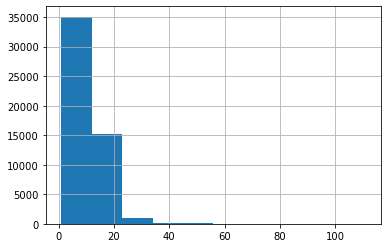

The distribution is skewed to the right
---------------------------------------
Statistics on: age_than_posted
count    51525.000000
mean         9.501989
std          6.106861
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: age_than_posted, dtype: float64
---------------------------------------
min border: 2.0
max border: 20.0
---------------------------------------
The outliers are considered to be values below 2.0 and above 20.0
We have 4222 values that we can consider outliers


In [72]:
distribution_percentile('age_than_posted')

In [73]:
def distribution_percentile(odometer):
    print('The histogram of: {}'.format('odometer'))
    auto['odometer'].hist()
    plt.show()
    if auto['odometer'].mean()>auto['odometer'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('odometer'))
    print(auto['odometer'].describe())
    ninety_five = np.percentile(auto['odometer'], 95)
    five = np.percentile(auto['odometer'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(auto[(auto['odometer']<five)|(auto['odometer']>ninety_five)]),"values that we can consider outliers")

The histogram of: odometer


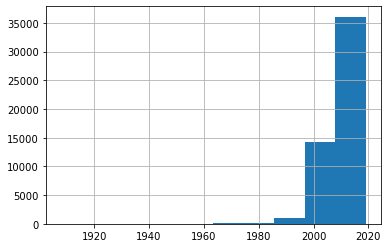

The distribution is skewed to the left
---------------------------------------
Statistics on: odometer
count    51525.000000
mean      2009.805473
std          6.093173
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 2000.0
max border: 2018.0
---------------------------------------
The outliers are considered to be values below 2000.0 and above 2018.0
We have 2831 values that we can consider outliers


In [74]:
distribution_percentile('odometer')

Using **percentiles** we descovered upper limits(as usked) and that our distribution in **'odometer'is skewed to the left** and others to the right. Now we can take care of outliers.

In [75]:
def distribution_percentile(new_condition):
    print('The histogram of: {}'.format('new_condition'))
    auto['new_condition'].hist()
    plt.show()
    if auto['new_condition'].mean()>auto['new_condition'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('new_condition'))
    print(auto['new_condition'].describe())
    ninety_five = np.percentile(auto['new_condition'], 95)
    five = np.percentile(auto['new_condition'], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(auto[(auto['new_condition']<five)|(auto['new_condition']>ninety_five)]),"values that we can consider outliers")

The histogram of: new_condition


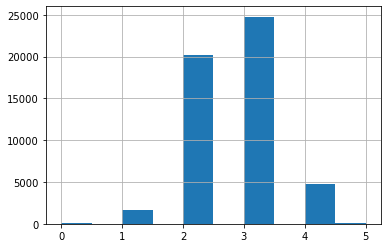

The distribution is skewed to the left
---------------------------------------
Statistics on: new_condition
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: new_condition, dtype: float64
---------------------------------------
min border: 2.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 2.0 and above 4.0
We have 1865 values that we can consider outliers


In [76]:
distribution_percentile('new_condition')

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

**Borders list:**

In [77]:
limits_list=[]
for parameter in ['price','cylinders','age_than_posted','odometer','new_condition']:
    ninety_five = np.percentile(auto[parameter], 95)
    five = np.percentile(auto[parameter], 5)
    limits_list.append([parameter,five,ninety_five])
    

In [78]:
limits_list

[['price', 1950.0, 30300.0],
 ['cylinders', 4.0, 8.0],
 ['age_than_posted', 2.0, 20.0],
 ['odometer', 2000.0, 2018.0],
 ['new_condition', 2.0, 4.0]]

In [79]:
limits_data=pd.DataFrame(limits_list,columns=['parameter','min_border','max_border'])
limits_data

,parameter,min_border,max_border
0,price,1950.0,30300.0
1,cylinders,4.0,8.0
2,age_than_posted,2.0,20.0
3,odometer,2000.0,2018.0
4,new_condition,2.0,4.0


**Storing data without outliers in a separate DataFrame**:

In [80]:
filter_1 = (auto['price']>0)&(auto['price']<30300)
auto[filter_1]
auto_clean = auto[filter_1]
filter_2 = (auto['cylinders']>0)&(auto['cylinders']<8)
auto_clean = auto[filter_2]
filter_3 = (auto['age_than_posted']>0)&(auto['age_than_posted']<19)
auto_clean = auto[filter_3]
filter_4 = (auto['odometer']>0)&(auto['odometer']<8)
auto_clean = auto[filter_4]
filter_5 = (auto['new_condition']>0)&(auto['new_condition']<4)
auto_clean = auto[filter_5]




In [81]:


auto_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             46525 non-null  int64  
 1   model_year        46525 non-null  int32  
 2   model             46525 non-null  object 
 3   condition         46525 non-null  object 
 4   cylinders         46525 non-null  int32  
 5   fuel              46525 non-null  object 
 6   odometer          46525 non-null  int32  
 7   transmission      46525 non-null  object 
 8   type              46525 non-null  object 
 9   paint_color       46525 non-null  object 
 10  is_4wd            46525 non-null  object 
 11  date_posted       46525 non-null  object 
 12  days_listed       46525 non-null  int64  
 13  day_posted        46525 non-null  object 
 14  month_posted      46525 non-null  int64  
 15  year_posted       46525 non-null  int64  
 16  age_than_posted   46525 non-null  int64 

In [82]:
auto_clean.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8,251.375000,2
1,25500,2011,ford f150,good,6,gas,2011,automatic,pickup,white,1.0,2018-10-19,50,Friday,10,2018,8,251.375000,2
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,17,117.823529,1
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3,672.333333,3
5,14990,2014,chrysler 300,excellent,6,gas,2014,automatic,sedan,black,1.0,2018-06-20,15,Wednesday,6,2018,5,402.800000,3
6,12990,2015,toyota camry,excellent,4,gas,2015,automatic,sedan,white,0,2018-12-27,73,Thursday,12,2018,4,503.750000,3
7,15990,2013,honda pilot,excellent,6,gas,2013,automatic,SUV,black,1.0,2019-01-07,68,Monday,1,2019,7,287.571429,3
8,11500,2012,kia sorento,excellent,4,gas,2012,automatic,SUV,unknown,1.0,2018-07-16,19,Monday,7,2018,7,287.428571,3
9,9200,2008,honda pilot,excellent,6,gas,2008,automatic,SUV,blue,1.0,2019-02-15,17,Friday,2,2019,12,167.333333,3
10,19500,2011,chevrolet silverado 1500,excellent,8,gas,2011,automatic,pickup,black,1.0,2018-09-17,38,Monday,9,2018,8,251.375000,3


In [83]:
(46525 / 51525 )* 100


90.29597282872392

**After the cleaning of outliers there are more than 90% of data left**

## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

In [84]:
def distribution_percentile(price):
    print('The histogram of: {}'.format('price'))
    auto_clean['price'].hist(bins = 30, range=(0,5500))
    plt.show()
    if auto_clean['price'].mean()>auto_clean['price'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('price'))
    print(auto_clean['price'].describe())
   

The histogram of: price


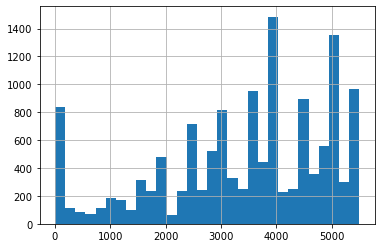

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     46525.000000
mean      11645.948436
std        9597.023988
min           1.000000
25%        4995.000000
50%        8988.000000
75%       15995.000000
max      375000.000000
Name: price, dtype: float64


In [85]:
distribution_percentile('price')

In [86]:
def distribution_percentile(cylinders):
    print('The histogram of: {}'.format('cylinders'))
    auto_clean['cylinders'].hist(bins=30, range=(0,11))
    plt.show()
    if auto_clean['cylinders'].mean()>auto_clean['cylinders'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('cylinders'))
    print(auto_clean['cylinders'].describe())
    

The histogram of: cylinders


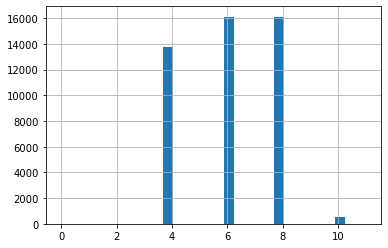

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    46525.000000
mean         6.144997
std          1.653099
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


In [87]:
distribution_percentile('cylinders')

In [88]:
def distribution_percentile(age_than_posted):
    print('The histogram of: {}'.format('age_than_posted'))
    auto_clean['age_than_posted'].hist(bins=10, range=(0,65))
    plt.show()
    if auto_clean['age_than_posted'].mean()>auto_clean['age_than_posted'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('age_than_posted'))
    print(auto_clean['age_than_posted'].describe())
    

The histogram of: age_than_posted


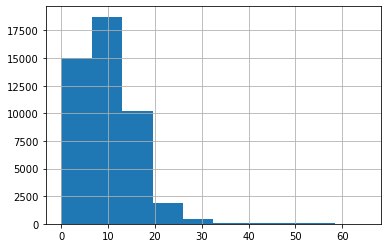

The distribution is skewed to the right
---------------------------------------
Statistics on: age_than_posted
count    46525.000000
mean         9.761956
std          6.085442
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age_than_posted, dtype: float64


In [89]:
distribution_percentile('age_than_posted')

In [90]:
def distribution_percentile(odometer):
    print('The histogram of: {}'.format('odometer'))
    auto_clean['odometer'].hist(bins=20, range=(0,11))
    plt.show()
    if auto_clean['odometer'].mean()>auto_clean['odometer'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('odometer'))
    print(auto_clean['odometer'].describe())
    

The histogram of: odometer


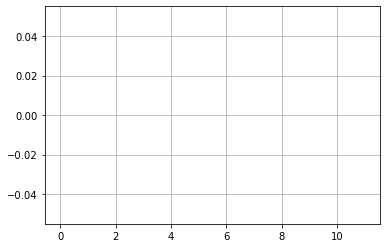

The distribution is skewed to the left
---------------------------------------
Statistics on: odometer
count    46525.000000
mean      2009.544503
std          6.070692
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: odometer, dtype: float64


In [91]:
distribution_percentile('odometer')

In [92]:
def distribution_percentile(new_condition):
    print('The histogram of: {}'.format('new_condition'))
    auto_clean['new_condition'].hist(bins=10)
    plt.show()
    if auto_clean['new_condition'].mean()>auto_clean['new_condition'].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format('new_condition'))
    print(auto_clean['new_condition'].describe())
    

The histogram of: new_condition


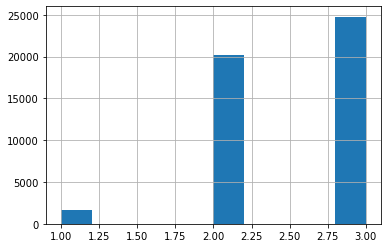

The distribution is skewed to the left
---------------------------------------
Statistics on: new_condition
count    46525.000000
mean         2.497926
std          0.564875
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: new_condition, dtype: float64


In [93]:
distribution_percentile('new_condition')

**Now we can cee(after masking outliers) only main values in our graphs!**

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [94]:
import matplotlib.pyplot as plt

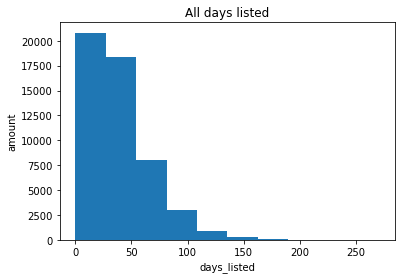

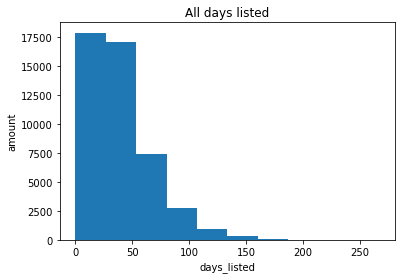

In [95]:
auto['days_listed'].plot(kind = 'hist',title='All days listed')
plt.xlabel('days_listed')
plt.ylabel('amount')
plt.show()
auto_clean['days_listed'].plot(kind = 'hist',title='All days listed')
plt.xlabel('days_listed')
plt.ylabel('amount')
plt.show()


,price,model_year,cylinders,odometer,days_listed,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
price,1.000000,0.410966,0.287119,0.410966,0.001477,-0.005269,0.004875,-0.409601,0.426780,0.166635
model_year,0.410966,1.000000,-0.145300,1.000000,-0.003387,-0.006901,0.005940,-0.997126,0.596908,0.249795
cylinders,0.287119,-0.145300,1.000000,-0.145300,0.003379,-0.001218,0.001541,0.145065,-0.030687,-0.068525
odometer,0.410966,1.000000,-0.145300,1.000000,-0.003387,-0.006901,0.005940,-0.997126,0.596908,0.249795
days_listed,0.001477,-0.003387,0.003379,-0.003387,1.000000,-0.012624,0.013322,0.004388,-0.005227,0.001337
month_posted,-0.005269,-0.006901,-0.001218,-0.006901,-0.012624,1.000000,-0.817474,-0.055047,0.068326,0.001479
year_posted,0.004875,0.005940,0.001541,0.005940,0.013322,-0.817474,1.000000,0.069833,-0.082650,-0.001686
age_than_posted,-0.409601,-0.997126,0.145065,-0.997126,0.004388,-0.055047,0.069833,1.000000,-0.601723,-0.249317
mileage_per_year,0.426780,0.596908,-0.030687,0.596908,-0.005227,0.068326,-0.082650,-0.601723,1.000000,0.141683
new_condition,0.166635,0.249795,-0.068525,0.249795,0.001337,0.001479,-0.001686,-0.249317,0.141683,1.000000


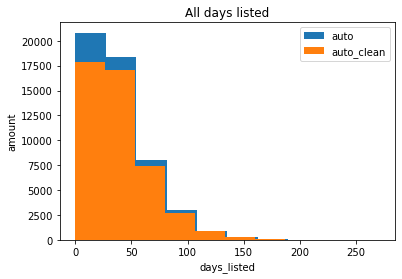

In [96]:
auto['days_listed'].plot(kind = 'hist')
auto_clean['days_listed'].plot(kind = 'hist')
plt.title('All days listed')
plt.xlabel('days_listed')
plt.ylabel('amount')
plt.legend(['auto','auto_clean'])
auto_clean.corr()

In [97]:
print(auto['days_listed'].mean())
print(auto_clean['days_listed'].mean())
print()
print(auto['days_listed'].median())
print(auto_clean['days_listed'].median())

39.55475982532751
39.60315959161741

33.0
33.0


In [98]:
days_listed_long = auto_clean.query('days_listed >=150')
days_listed_long

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
51,3800,2012,ford focus,good,4,gas,2012,automatic,sedan,black,0,2018-11-29,261,Thursday,11,2018,7,287.428571,2
89,18800,2015,chevrolet camaro lt coupe 2d,good,6,gas,2015,other,coupe,grey,0,2019-01-16,152,Wednesday,1,2019,5,403.000000,2
228,8795,2014,honda civic,excellent,4,gas,2014,automatic,sedan,grey,0,2018-09-11,164,Tuesday,9,2018,5,402.800000,3
878,13250,2008,toyota 4runner,excellent,6,gas,2008,automatic,SUV,black,1.0,2018-06-19,151,Tuesday,6,2018,11,182.545455,3
1523,50948,2017,chevrolet silverado 2500hd,excellent,8,diesel,2017,automatic,pickup,black,1.0,2018-11-17,155,Saturday,11,2018,2,1008.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50696,4200,2008,ford explorer,good,6,gas,2008,automatic,SUV,black,1.0,2018-09-25,150,Tuesday,9,2018,11,182.545455,2
50921,9995,2012,toyota tacoma,excellent,6,gas,2012,automatic,truck,grey,0,2018-09-19,162,Wednesday,9,2018,7,287.428571,3
51052,8495,2013,hyundai elantra,good,4,gas,2013,automatic,sedan,blue,0,2018-06-30,158,Saturday,6,2018,6,335.500000,2
51321,3500,2005,toyota camry,excellent,4,gas,2005,automatic,sedan,green,0,2018-06-07,159,Thursday,6,2018,14,143.214286,3


In [99]:
days_listed_short = auto_clean.query('days_listed <=30')
days_listed_short

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8,251.375000,2
3,1500,2003,ford f150,fair,8,gas,2003,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,17,117.823529,1
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3,672.333333,3
5,14990,2014,chrysler 300,excellent,6,gas,2014,automatic,sedan,black,1.0,2018-06-20,15,Wednesday,6,2018,5,402.800000,3
8,11500,2012,kia sorento,excellent,4,gas,2012,automatic,SUV,unknown,1.0,2018-07-16,19,Monday,7,2018,7,287.428571,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51500,6995,2012,buick enclave,excellent,6,gas,2012,automatic,SUV,white,1.0,2018-08-04,17,Saturday,8,2018,7,287.428571,3
51505,2000,2000,ford f150,good,6,gas,2000,automatic,truck,white,0,2019-01-22,15,Tuesday,1,2019,20,100.000000,2
51506,28900,2017,ford f150 supercrew cab xlt,good,6,gas,2017,automatic,pickup,unknown,1.0,2019-04-11,25,Thursday,4,2019,3,672.333333,2
51509,5980,2010,subaru impreza,excellent,4,gas,2010,manual,hatchback,white,1.0,2019-01-10,8,Thursday,1,2019,10,201.000000,3


## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

**ADS**

In [100]:
import seaborn as sns

In [101]:
price_averege=auto_clean.groupby(['days_listed'])['price'].agg(['count','mean']).reset_index()


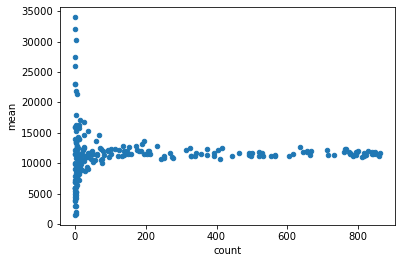

In [102]:
price_averege.plot(x='count', y='mean',kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='count', ylabel='mean'>

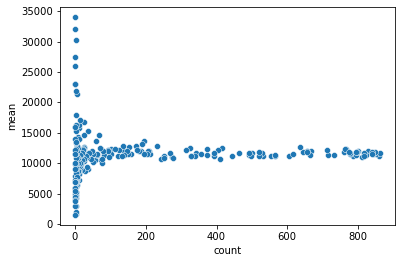

In [103]:
sns.scatterplot(data=price_averege, x="count", y="mean")

In [104]:
price_averege_1=auto_clean.groupby(['type'])['days_listed'].agg('count').reset_index()

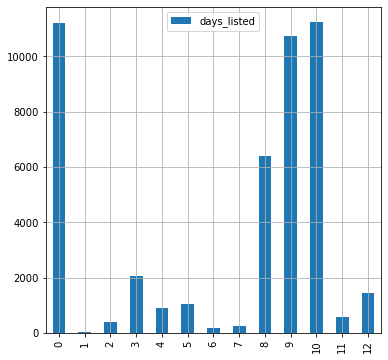

In [105]:
price_averege_1.plot(kind ='bar', grid = True, figsize= (6,6))
plt.show()

<AxesSubplot:xlabel='type', ylabel='days_listed'>

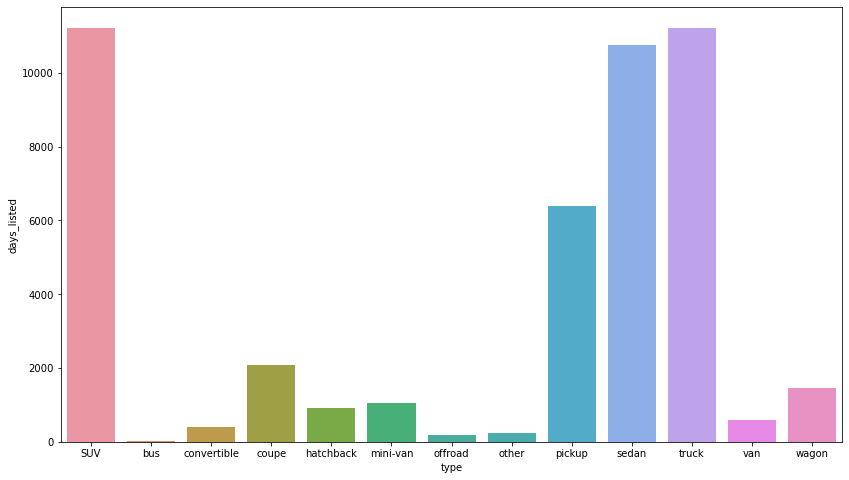

In [106]:
plt.figure(figsize=(14,8))
sns.barplot(x="type", y="days_listed", data=price_averege_1)

**We can cee that the more valueble type is the more days it listed**

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

**Leading  types**

In [107]:
leading_types = auto_clean.pivot_table(index = ('type','days_listed'), values = 'price', aggfunc = 'count',).reset_index()
leading_types.reset_index().sort_values(by='price',ascending=False)

,index,type,days_listed,price
1241,1241,truck,19,224
1249,1249,truck,27,223
1240,1240,truck,18,220
1059,1059,sedan,20,218
24,24,SUV,24,218
...,...,...,...,...
779,779,offroad,91,1
776,776,offroad,82,1
774,774,offroad,72,1
772,772,offroad,69,1


We have chuce two car types for our further invistigations **CUV** and **sedan**

**CUV**

In [108]:
suv = auto_clean.query('type == "SUV"')
suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
0,9400,2011,bmw x5,good,6,gas,2011,automatic,SUV,unknown,1.0,2018-06-23,19,Saturday,6,2018,8,251.375000,2
7,15990,2013,honda pilot,excellent,6,gas,2013,automatic,SUV,black,1.0,2019-01-07,68,Monday,1,2019,7,287.571429,3
8,11500,2012,kia sorento,excellent,4,gas,2012,automatic,SUV,unknown,1.0,2018-07-16,19,Monday,7,2018,7,287.428571,3
9,9200,2008,honda pilot,excellent,6,gas,2008,automatic,SUV,blue,1.0,2019-02-15,17,Friday,2,2019,12,167.333333,3
14,12990,2009,gmc yukon,excellent,8,gas,2009,automatic,SUV,black,1.0,2019-01-31,24,Thursday,1,2019,11,182.636364,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51494,7999,2009,chevrolet equinox,excellent,6,gas,2009,automatic,SUV,silver,1.0,2019-01-03,8,Thursday,1,2019,11,182.636364,3
51495,9500,2012,chevrolet traverse,good,6,gas,2012,automatic,SUV,unknown,1.0,2019-03-05,1,Tuesday,3,2019,8,251.500000,2
51496,4999,2002,toyota 4runner,excellent,6,gas,2002,automatic,SUV,unknown,1.0,2018-05-26,59,Saturday,5,2018,17,117.764706,3
51500,6995,2012,buick enclave,excellent,6,gas,2012,automatic,SUV,white,1.0,2018-08-04,17,Saturday,8,2018,7,287.428571,3


In [109]:
suv.corr()

,price,model_year,cylinders,odometer,days_listed,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
price,1.000000,0.528535,0.071285,0.528535,-0.009656,-0.003233,0.006620,-0.526617,0.485899,0.235208
model_year,0.528535,1.000000,-0.235446,1.000000,-0.013737,-0.010644,0.012377,-0.996384,0.627830,0.297777
cylinders,0.071285,-0.235446,1.000000,-0.235446,0.022074,-0.000108,-0.000615,0.234790,-0.108135,-0.086075
odometer,0.528535,1.000000,-0.235446,1.000000,-0.013737,-0.010644,0.012377,-0.996384,0.627830,0.297777
days_listed,-0.009656,-0.013737,0.022074,-0.013737,1.000000,-0.004530,-0.001234,0.013597,-0.018810,-0.012708
month_posted,-0.003233,-0.010644,-0.000108,-0.010644,-0.004530,1.000000,-0.815597,-0.058687,0.056162,0.011407
year_posted,0.006620,0.012377,-0.000615,0.012377,-0.001234,-0.815597,1.000000,0.072627,-0.069248,-0.012110
age_than_posted,-0.526617,-0.996384,0.234790,-0.996384,0.013597,-0.058687,0.072627,1.000000,-0.632104,-0.298042
mileage_per_year,0.485899,0.627830,-0.108135,0.627830,-0.018810,0.056162,-0.069248,-0.632104,1.000000,0.195470
new_condition,0.235208,0.297777,-0.086075,0.297777,-0.012708,0.011407,-0.012110,-0.298042,0.195470,1.000000


In [110]:
suv_prises = suv.pivot_table(index = 'price', values = ['age_than_posted', 'odometer', 'new_condition']).reset_index()
suv_prises

,price,age_than_posted,new_condition,odometer
0,1,3.428571,2.974026,2015.883117
1,3,14.000000,2.000000,2005.000000
2,5,8.000000,2.000000,2011.000000
3,9,10.000000,2.000000,2010.000000
4,35,20.000000,1.000000,2000.000000
...,...,...,...,...
1489,62722,1.000000,3.000000,2019.000000
1490,64999,27.000000,2.000000,1992.000000
1491,66904,1.000000,3.000000,2018.000000
1492,76995,1.000000,3.000000,2018.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='price'>,
        <AxesSubplot:xlabel='new_condition', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='age_than_posted'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='age_than_posted'>,
        <AxesSubplot:xlabel='new_condition', ylabel='age_than_posted'>,
        <AxesSubplot:xlabel='odometer', ylabel='age_than_posted'>],
       [<AxesSubplot:xlabel='price', ylabel='new_condition'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='new_condition'>,
        <AxesSubplot:xlabel='new_condition', ylabel='new_condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='new_condition'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='odometer'>,
        <AxesSubplot:xlabel='new_condition', ylabel='odometer'>,
        <AxesSubplot:xlab

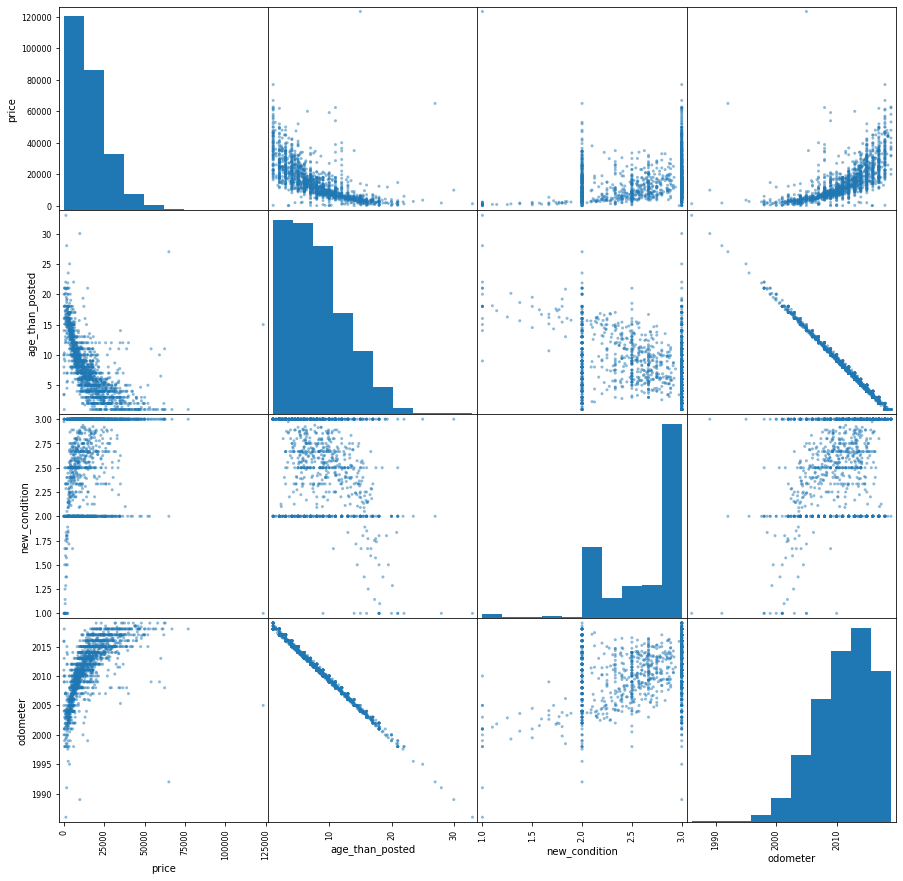

In [111]:
pd.plotting.scatter_matrix(suv_prises,figsize=(15, 15))

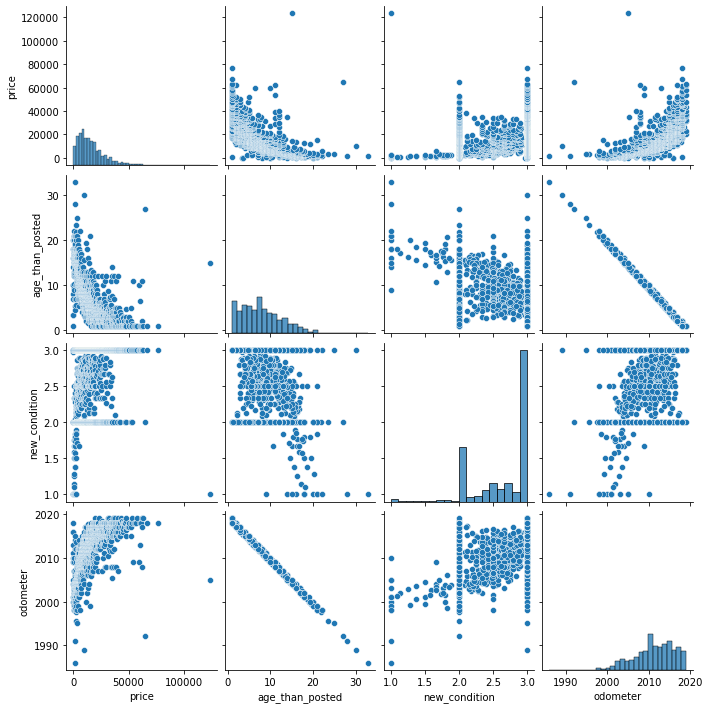

In [112]:
sns.pairplot(suv_prises)

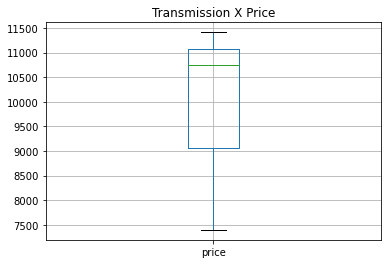

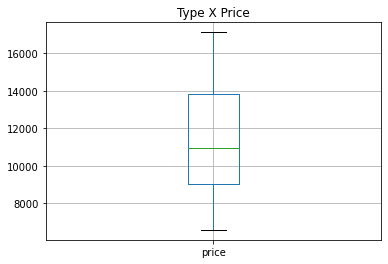

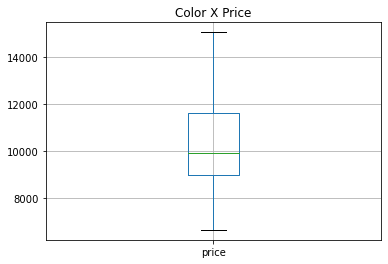

In [113]:
cat_suv = suv.pivot_table(index = 'transmission',values = 'price')
cat_suv.boxplot()
plt.title('Transmission X Price')
plt.show()
cat_suv = auto_clean.pivot_table(index = 'type',values = 'price')
cat_suv.boxplot()
plt.title('Type X Price')
plt.show()
cat_suv = suv.pivot_table(index = 'paint_color',values = 'price')
cat_suv.boxplot()
plt.title('Color X Price')
plt.show()


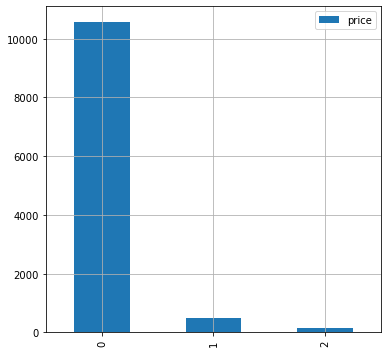

In [114]:
trans = suv.groupby(['transmission'])['price'].agg('count').reset_index()
trans.plot(kind ='bar', grid = True, figsize= (6,6))
plt.show()


<AxesSubplot:xlabel='transmission', ylabel='price'>

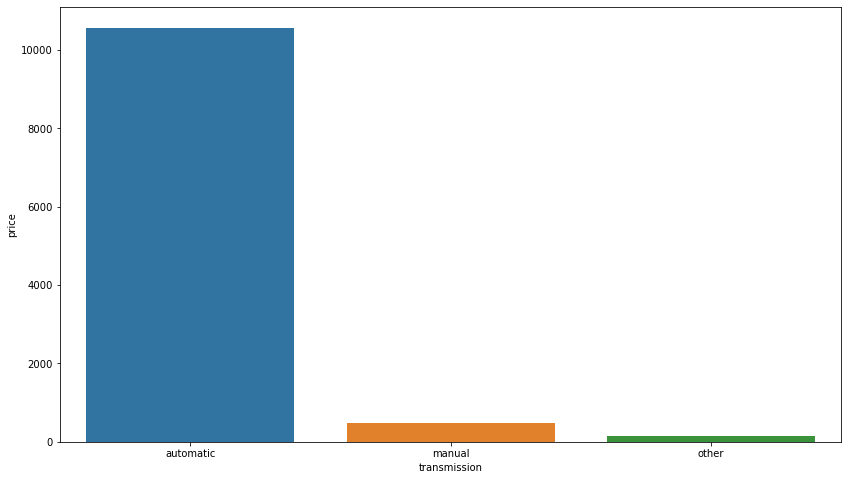

In [115]:
plt.figure(figsize=(14,8))
sns.barplot(x="transmission", y="price", data=trans)


**We can see strong 'price' X 'transmission' coreletion on the boxplot. SUVs with automatic transmission more valuable than SUVs with manual.**

In [116]:
suv['transmission'].value_counts()

automatic    10574
manual         488
other          147
Name: transmission, dtype: int64

In [117]:
auto_clean['type'].value_counts()

truck          11227
SUV            11209
sedan          10746
pickup          6382
coupe           2076
wagon           1465
mini-van        1060
hatchback        921
van              592
convertible      394
other            250
offroad          179
bus               24
Name: type, dtype: int64

In [118]:
suv['paint_color'].value_counts()

unknown    2016
black      1993
white      1727
silver     1435
grey       1037
blue        974
red         827
green       412
brown       332
custom      296
orange       76
yellow       47
purple       37
Name: paint_color, dtype: int64

***Sedan***

In [119]:
sedan = auto_clean.query('type == "sedan"')
sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
4,14900,2017,chrysler 200,excellent,4,gas,2017,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,3,672.333333,3
5,14990,2014,chrysler 300,excellent,6,gas,2014,automatic,sedan,black,1.0,2018-06-20,15,Wednesday,6,2018,5,402.800000,3
6,12990,2015,toyota camry,excellent,4,gas,2015,automatic,sedan,white,0,2018-12-27,73,Thursday,12,2018,4,503.750000,3
11,8990,2012,honda accord,excellent,4,gas,2012,automatic,sedan,grey,0,2019-03-28,29,Thursday,3,2019,8,251.500000,3
13,16500,2018,hyundai sonata,excellent,4,gas,2018,automatic,sedan,silver,0,2019-01-14,29,Monday,1,2019,2,1009.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51517,11000,2012,dodge charger,excellent,8,gas,2012,automatic,sedan,black,0,2019-04-19,44,Friday,4,2019,8,251.500000,3
51518,3750,2005,ford taurus,excellent,6,gas,2005,automatic,sedan,silver,0,2018-08-10,63,Friday,8,2018,14,143.214286,3
51522,3950,2009,hyundai sonata,excellent,4,gas,2009,automatic,sedan,blue,0,2018-11-15,32,Thursday,11,2018,10,200.900000,3
51523,7455,2013,toyota corolla,good,4,gas,2013,automatic,sedan,black,0,2018-07-02,71,Monday,7,2018,6,335.500000,2


In [120]:
sedan.corr()

,price,model_year,cylinders,odometer,days_listed,month_posted,year_posted,age_than_posted,mileage_per_year,new_condition
price,1.000000,0.548063,-0.051004,0.548063,0.007658,-0.010026,0.007841,-0.545192,0.476752,0.266541
model_year,0.548063,1.000000,-0.129655,1.000000,0.003882,-0.011025,0.007013,-0.995457,0.639318,0.288315
cylinders,-0.051004,-0.129655,1.000000,-0.129655,0.002325,-0.010769,0.004206,0.129553,-0.028345,-0.046090
odometer,0.548063,1.000000,-0.129655,1.000000,0.003882,-0.011025,0.007013,-0.995457,0.639318,0.288315
days_listed,0.007658,0.003882,0.002325,0.003882,1.000000,-0.011568,0.017314,-0.002218,0.008006,-0.000376
month_posted,-0.010026,-0.011025,-0.010769,-0.011025,-0.011568,1.000000,-0.818503,-0.066951,0.082781,0.003570
year_posted,0.007841,0.007013,0.004206,0.007013,0.017314,-0.818503,1.000000,0.088229,-0.098773,0.003574
age_than_posted,-0.545192,-0.995457,0.129553,-0.995457,-0.002218,-0.066951,0.088229,1.000000,-0.646245,-0.286858
mileage_per_year,0.476752,0.639318,-0.028345,0.639318,0.008006,0.082781,-0.098773,-0.646245,1.000000,0.205936
new_condition,0.266541,0.288315,-0.046090,0.288315,-0.000376,0.003570,0.003574,-0.286858,0.205936,1.000000


In [121]:
sedan_prises = sedan.pivot_table(index = 'price', values = ['age_than_posted', 'odometer', 'new_condition']).reset_index()
sedan_prises

,price,age_than_posted,new_condition,odometer
0,1,3.173913,2.949275,2016.15942
1,12,5.500000,2.500000,2013.50000
2,32,18.000000,3.000000,2001.00000
3,35,14.000000,3.000000,2006.00000
4,39,14.000000,3.000000,2005.50000
...,...,...,...,...
1106,32999,1.000000,3.000000,2018.50000
1107,40000,1.000000,3.000000,2018.00000
1108,49750,57.000000,3.000000,1962.00000
1109,52000,6.000000,2.000000,2013.00000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='price'>,
        <AxesSubplot:xlabel='new_condition', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='age_than_posted'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='age_than_posted'>,
        <AxesSubplot:xlabel='new_condition', ylabel='age_than_posted'>,
        <AxesSubplot:xlabel='odometer', ylabel='age_than_posted'>],
       [<AxesSubplot:xlabel='price', ylabel='new_condition'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='new_condition'>,
        <AxesSubplot:xlabel='new_condition', ylabel='new_condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='new_condition'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='age_than_posted', ylabel='odometer'>,
        <AxesSubplot:xlabel='new_condition', ylabel='odometer'>,
        <AxesSubplot:xlab

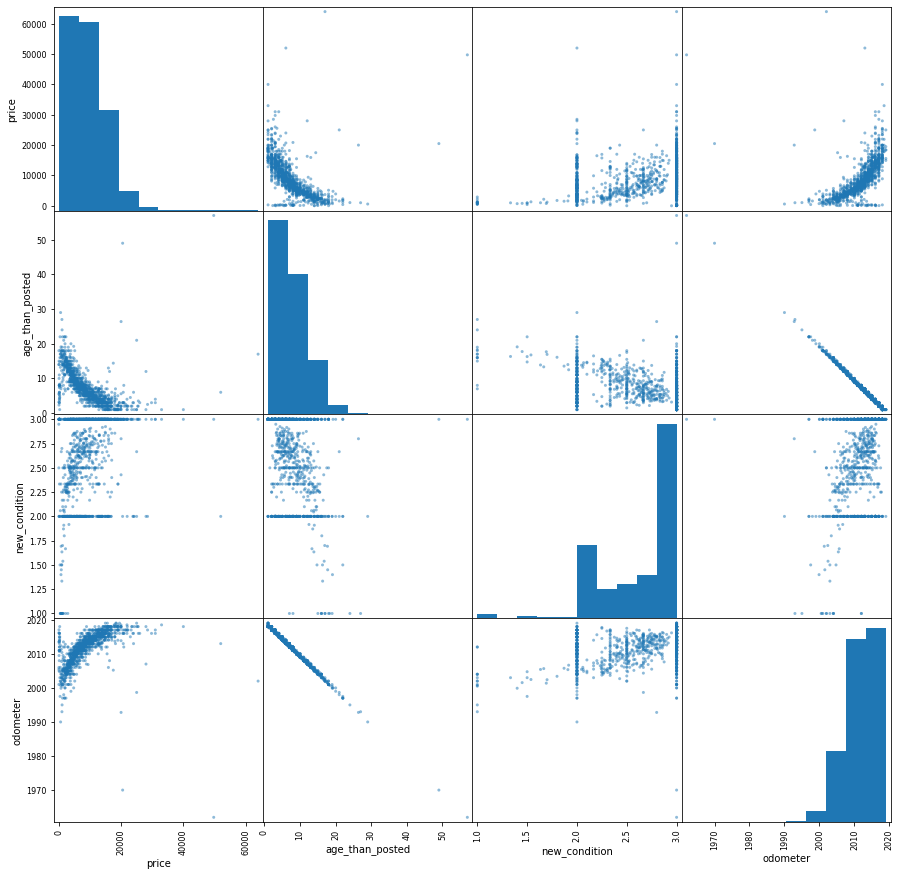

In [122]:
pd.plotting.scatter_matrix(sedan_prises,figsize=(15, 15))

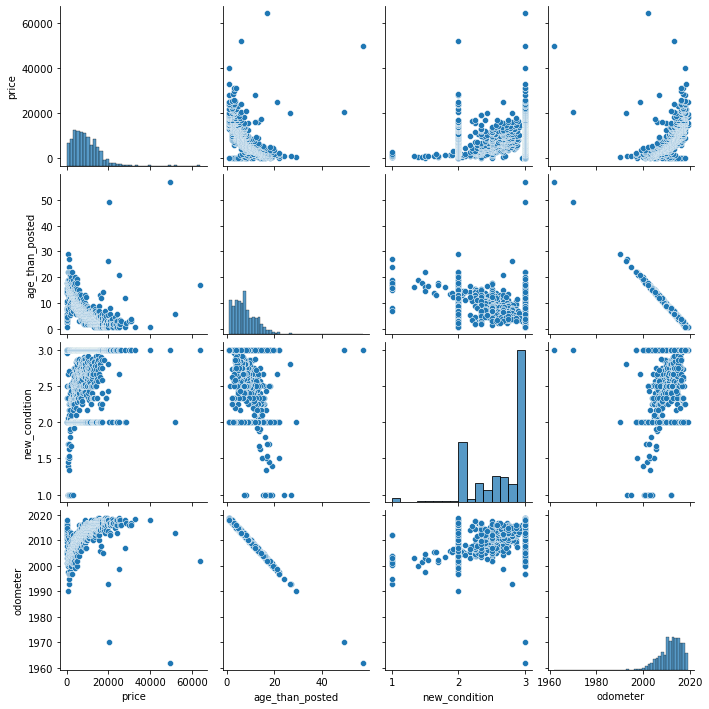

In [123]:
sns.pairplot(sedan_prises)

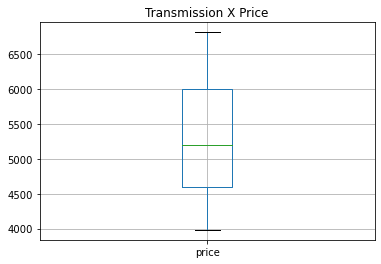

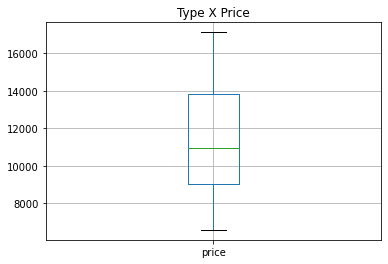

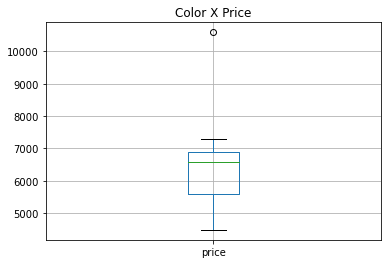

In [124]:
cat_sedan = sedan.pivot_table(index = 'transmission',values = 'price')
cat_sedan.boxplot()
plt.title('Transmission X Price')
plt.show()
cat_sedan = auto_clean.pivot_table(index = 'type',values = 'price')
cat_sedan.boxplot()
plt.title('Type X Price')
plt.show()
cat_sedan = sedan.pivot_table(index = 'paint_color',values = 'price')
cat_sedan.boxplot()
plt.title('Color X Price')
plt.show()


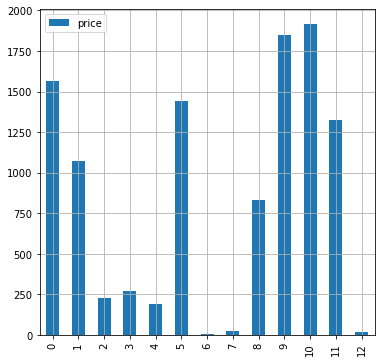

In [125]:
color = sedan.groupby(['paint_color'])['price'].agg('count').reset_index()
color.plot(kind ='bar', grid = True, figsize= (6,6))

plt.show()

<AxesSubplot:xlabel='paint_color', ylabel='price'>

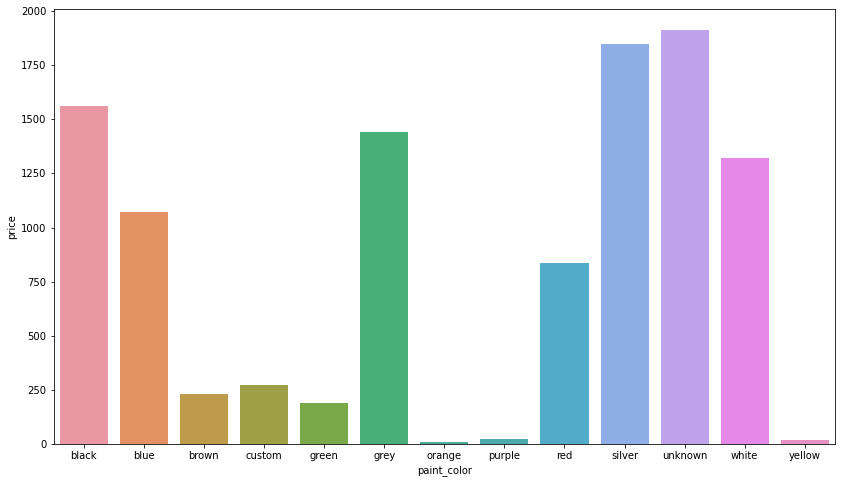

In [126]:
plt.figure(figsize=(14,8))
sns.barplot(x="paint_color", y="price", data=color)

**We can see strong 'paint_color' X 'price' coreletion on the boxplot.
Most valueble colors are silver, gray, black and white.**


## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

**First look**

There are **51525** entries.
We have missing values in: **model_year, cylinders, odometer, paint_color, is_4wd** columns. 
We will change data type to **int** in: **model_year, cylinders, odometer**.
In the **is_4wd** column we should assume that NoNs are '0' in other words 'not 4wds'.
**date_posted** we should change from object to data type

**Missing values**

In the **'model_year'** column we sorted out really old cars and changed data typs to **int**.
<br>
In the **'cylinders'** column we filled out missing values by mean value of **'model','model_year'** and changed data typs to **int**.
<br>
In the **'odometer'** column we filled out missing values by mean value of **'model','model_year'**and changed data typs to **int**.
<br>
In the **'paint_color'** we changed NaN color to 'Unknown'
<br>
In the **is_4wd** we filled NaNs with '0'

**Duplicates**

In the **'model'** column we removed all duplicate by replacing '-' inyo ' '

**Enrich data**

We added datetime values for when the ad was placed
<br>
We added the vehicle's age when the ad was placed
<br>
We added the vehicle's average mileage per year
<br>
Replaced the condition values with numerical values (by using dictionary) and created column **'new_conditon'**

**Outliers**

 We stydied parameters:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition
Outliers was found and we masked them and saved result in new dataset.


 **Price factors**

By stydiyng the clean dataset(without outliers) we descavered that :
<br>
**We can see strong 'price' X 'transmission' coreletion on the boxplot. SUVs with automatic transmission more valuable than SUVs with manual.**
<br>
**We can see strong 'paint_color' X 'price' coreletion on the boxplot. Most valueble colors are silver, gray, black and white.**